# Entradas/Salidas, procesamiento de imágenes

## Entradas/Salidas

Para facilitar el intercambio de información con otras plataformas, el módulo IO ofrece funciones para importar/exportar datos en varios formatos.
Por ejemplo, para intercambiar información con MatLab se utilizan archivos .MAT

In [123]:
import numpy as np
from scipy import io as spio

In [157]:
# Crear algunas matrices para las pruebas
a = np.ones((4,2))
b = np.zeros((3,4))
c = np.random.rand(1,2)
d = np.eye(3)

# Salvar las matrices en formato .MAT
# Las llaves del diccionario son los nombres que se usaran posteriormente para recuperar los datos
spio.savemat('datos.mat', {'a':a, 'mat2':b, 'hola':c, 'info':d})

# Recuperar datos de un archivo .MAT
data = spio.loadmat('datos.mat')
data['info']

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

Un formato comúnmente utilizado en mineria de datos es el formato ARFF. SciPy ofrece un módulo para leer archivos en este formato. soybean.arff es un dataset sobre enfermedades de la soya (https://archive.ics.uci.edu/ml/datasets/soybean+(small)).

In [172]:
# Importar el modulo arff
from scipy.io import arff

# Leer el archivo y devolver en datos la matriz de datos y 
# en metadatos la descripción de los atributos que lo componen
datos,metadatos = arff.loadarff('soybean.arff')


In [173]:
datos[0]

(b'october', b'normal', b'gt-norm', b'norm', b'yes', b'same-lst-yr', b'low-areas', b'pot-severe', b'none', b'90-100', b'abnorm', b'abnorm', b'absent', b'dna', b'dna', b'absent', b'absent', b'absent', b'abnorm', b'no', b'above-sec-nde', b'brown', b'present', b'firm-and-dry', b'absent', b'none', b'absent', b'norm', b'dna', b'norm', b'absent', b'absent', b'norm', b'absent', b'norm', b'diaporthe-stem-canker')

In [174]:
metadatos

Dataset: soybean
	date's type is nominal, range is ('april', 'may', 'june', 'july', 'august', 'september', 'october')
	plant-stand's type is nominal, range is ('normal', 'lt-normal')
	precip's type is nominal, range is ('lt-norm', 'norm', 'gt-norm')
	temp's type is nominal, range is ('lt-norm', 'norm', 'gt-norm')
	hail's type is nominal, range is ('yes', 'no')
	crop-hist's type is nominal, range is ('diff-lst-year', 'same-lst-yr', 'same-lst-two-yrs', 'same-lst-sev-yrs')
	area-damaged's type is nominal, range is ('scattered', 'low-areas', 'upper-areas', 'whole-field')
	severity's type is nominal, range is ('minor', 'pot-severe', 'severe')
	seed-tmt's type is nominal, range is ('none', 'fungicide', 'other')
	germination's type is nominal, range is ('90-100', '80-89', 'lt-80')
	plant-growth's type is nominal, range is ('norm', 'abnorm')
	leaves's type is nominal, range is ('norm', 'abnorm')
	leafspots-halo's type is nominal, range is ('absent', 'yellow-halos', 'no-yellow-halos')
	leafspot

Información detallada sobre funciones de I/O y formatos soportados se pueden consultar aquí:
https://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io

## Procesamiento de imágenes

El módulo ndimage proporciona funciones para el procesamiento digital de imágenes

In [125]:
from scipy import ndimage

In [126]:
# Leer una imagen desde un archivo en formatos estándar (jpeg, png, etc)
flor = ndimage.imread('flower1.jpeg')

In [127]:
# Observar que la imagen queda en forma de matriz: filas x columnas x 3 colores (RGB)
flor.shape

(183, 276, 3)

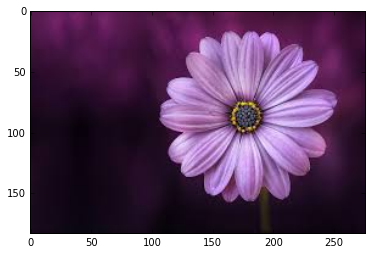

In [128]:
import matplotlib.pyplot as plt
plt.imshow(flor)
plt.show()

### Filtrado

Una de las tareas más comunes en el procesamiento de imágenes es el filtrado. Algunos ejemplos de operaciones de filtrado son:

In [129]:
# Crear una copia de la imagen
copia = flor.copy().astype(np.float)
# Agregar ruido gausiano a la imagen
copiaRuido = copia + copia.std()*0.0005*np.random.standard_normal(copia.shape)
# Aplicar un filtro gausiano a la imagen
filtroGausiano = ndimage.gaussian_filter(copiaRuido, sigma=3)
# Aplicar el filtro de la mediana
filtroMediana = ndimage.median_filter(copiaRuido, size=5)

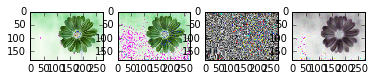

In [130]:
# Crear una figura con varios subgrafos para mostrar los resultados
plt.figure(1)
plt.subplot(141)
plt.imshow(copia)
plt.subplot(142)
plt.imshow(copiaRuido)
plt.subplot(143)
plt.imshow(filtroGausiano)
plt.subplot(144)
plt.imshow(filtroMediana)
plt.show()

### Transformación

Las operaciones de transformación permiten realizar tareas tales como cambiar el tamaño (zoom), rotar, desplazar imágenes.

In [155]:
desplazada = ndimage.shift( flor, np.array([-14,-100,0]) )
rotada = ndimage.rotate( flor, np.radians(60))
ampliada = ndimage.zoom( flor, np.array([2.0,2.0,1.0]) )
ampliada.shape

(366, 552, 3)

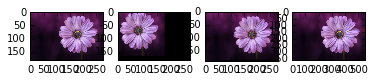

In [156]:
# Crear una figura para mostrar los resultados de las transformaciones
plt.figure(2)
plt.subplot(141)
plt.imshow(flor)
plt.subplot(142)
plt.imshow(desplazada)
plt.subplot(143)
plt.imshow(rotada)
plt.subplot(144)
plt.imshow(ampliada)
plt.show()

## Referencias

Biblioteca de procesamiento de imágenes de SciPy
https://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage

Manipulación de imágenes con matplotlib
https://matplotlib.org/users/image_tutorial.html
